Imports

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
import time



In [69]:
#readfile
df = pd.read_csv("bread basket.csv")


In [70]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [71]:
df.head(25)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [72]:
df.shape

(20507, 5)

In [73]:
df.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [74]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [75]:
#unique value generation
categorical = ['Transaction','Item','date_time','period_day','weekday_weekend']
for col in categorical:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))


Unique values in 'Transaction':
Transaction
6716    11
6279    11
6474    11
6412    11
6045    10
        ..
4495     1
4494     1
4492     1
4491     1
9684     1
Name: count, Length: 9465, dtype: int64

Unique values in 'Item':
Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

Unique values in 'date_time':
date_time
05-02-2017 11:58    12
09-02-2017 13:44    11
11-02-2017 14:08    11
17-02-2017 14:18    11
12-02-2017 14:35    11
                    ..
11-01-2017 09:16     1
10-01-2017 16:32     1
10-01-2017 16:31     1
10-01-2017 16:29     1
09-04-2017 15:04     1
Name: count, Length: 9182, dtype: int64

Unique values in 'period_day':
period_day
afternoon    11569
morning       8404
evening        520
night           14
Name: count, dtype:

Basic EDA

In [76]:
#EDA for top items
top_items = df['Item'].value_counts().head(10).reset_index()
top_items.columns = ['Item', 'Count']

fig = px.pie(
    top_items,
    values='Count',
    names='Item',
    title='Top 10 Most Purchased Items',
    hole=0.45,
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(
    textinfo='label+percent+value',
    textfont_size=16,
    pull=[0.03] * len(top_items)
)

fig.update_layout(
    title_font_size=24,
    height=700,
    width=700,
    margin=dict(t=80, b=20, l=20, r=20)
)

fig.show()


In [77]:
#BAsic EDA
item_counts = df['Item'].value_counts()

filtered_items = item_counts

least_items = filtered_items.nsmallest(15).reset_index()
least_items.columns = ['item', 'count']

fig = px.bar(
    least_items,
    x='count',
    y='item',
    orientation='h',
    title='Top 15 Least Purchased Items',
    text='count',
    color='item',
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


In [78]:

#BAsic EDA
period_counts = df['period_day'].value_counts().reset_index()
period_counts.columns = ['period_day', 'count']

fig = px.bar(
    period_counts,
    x='period_day',
    y='count',
    title='Transactions by Period of the Day',
    text='count',
    color='period_day',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textposition='outside')
fig.show()


In [79]:

#BAsic EDA
week_counts = df['weekday_weekend'].value_counts().reset_index()
week_counts.columns = ['weekday_weekend', 'count']

fig = px.bar(
    week_counts,
    x='weekday_weekend',
    y='count',
    title='Transactions: Weekday vs Weekend',
    text='count',
    color='weekday_weekend',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_traces(textposition='outside')
fig.show()


In [80]:

#BAsic EDA
df['date_time'] = pd.to_datetime(df['date_time'])
daily_transactions = df.groupby(df['date_time'].dt.date).size().reset_index(name='transaction_count')
fig = px.line(
    daily_transactions,
    x='date_time',
    y='transaction_count',
    title='Daily Transaction Volume Over Time',
    labels={'date_time': 'Date', 'transaction_count': 'Number of Transactions'},
    markers=True
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Transactions',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()

C:\Users\safal\AppData\Local\Temp\ipykernel_17488\642136202.py:2: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [81]:
import plotly.express as px

df['date_time'] = pd.to_datetime(df['date_time'])

df['hour'] = df['date_time'].dt.hour

hourly_counts = df['hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'transaction_count']

fig = px.line(
    hourly_counts,
    x='hour',
    y='transaction_count',
    title='Transactions per Hour of the Day',
    labels={'hour': 'Hour of Day (0-23)', 'transaction_count': 'Number of Transactions'},
    markers=True
)

fig.update_layout(
    xaxis=dict(dtick=1),
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


In [82]:

#BAsic EDA

df['period_day'] = df['period_day'].str.capitalize()

time_frames = ['Morning', 'Afternoon', 'Evening', 'Night']

for period in time_frames:
    period_df = df[df['period_day'] == period]

    agg = period_df.groupby('Item').size().reset_index(name='Transaction_Count').sort_values('Transaction_Count', ascending=False).head(10)

    fig = px.bar(
        agg,
        x='Transaction_Count',
        y='Item',
        orientation='h',
        color='Item',
        title=f'Top 10 Most Sold Items - {period}',
        color_discrete_sequence=px.colors.qualitative.Safe,
        text='Transaction_Count',
        height=500,
        width=900
    )

    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)
    fig.update_traces(textposition='outside')
    fig.show()


In [83]:
test_agg = df.groupby(['period_day', 'Item'])['Transaction'].count().reset_index()
print(test_agg.head(20))


   period_day                      Item  Transaction
0   Afternoon  Afternoon with the baker           19
1   Afternoon                 Alfajores          245
2   Afternoon           Argentina Night            3
3   Afternoon                  Art Tray           31
4   Afternoon                     Bacon            1
5   Afternoon                  Baguette           67
6   Afternoon                  Bakewell           30
7   Afternoon              Bare Popcorn            4
8   Afternoon             Bowl Nic Pitt            2
9   Afternoon                     Bread         1661
10  Afternoon             Bread Pudding            4
11  Afternoon        Brioche and salami            1
12  Afternoon                   Brownie          249
13  Afternoon                      Cake          731
14  Afternoon             Caramel bites            2
15  Afternoon     Cherry me Dried fruit            1
16  Afternoon              Chicken Stew          117
17  Afternoon              Chicken sand       

In [84]:
import plotly.express as px

df['period_day'] = df['period_day'].str.capitalize()

time_frames = ['Morning', 'Afternoon', 'Evening', 'Night']

for period in time_frames:
    period_df = df[df['period_day'] == period]

    agg = (
        period_df.groupby('Item')
        .size()
        .reset_index(name='Transaction_Count')
    )

    agg = agg[agg['Transaction_Count'] > 1]

    least_10 = agg.sort_values('Transaction_Count', ascending=True).head(10)

    fig = px.bar(
        least_10,
        x='Transaction_Count',
        y='Item',
        orientation='h',
        color='Item',
        title=f'Top 10 Least Sold Items (Excl. Single Purchases) - {period}',
        color_discrete_sequence=px.colors.sequential.Reds,
        text='Transaction_Count',
        height=500,
        width=700
    )

    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)
    fig.update_traces(textposition='outside')
    fig.show()


In [85]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)
df['period_day'] = df['period_day'].str.capitalize()
df['weekday_weekend'] = df['weekday_weekend'].str.capitalize()

for period in ['Weekday', 'Weekend']:
    period_df = df[df['weekday_weekend'] == period]

    agg = (
        period_df.groupby('Item')
        .size()
        .reset_index(name='Transaction_Count')
        .sort_values('Transaction_Count', ascending=False)
        .head(10)
    )

    fig = px.bar(
        agg,
        x='Transaction_Count',
        y='Item',
        orientation='h',
        color='Item',
        title=f'Top 10 Most Sold Items - {period}',
        color_discrete_sequence=px.colors.qualitative.Safe,
        text='Transaction_Count',
        height=500,
        width=700
    )
    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)
    fig.update_traces(textposition='outside')
    fig.show()


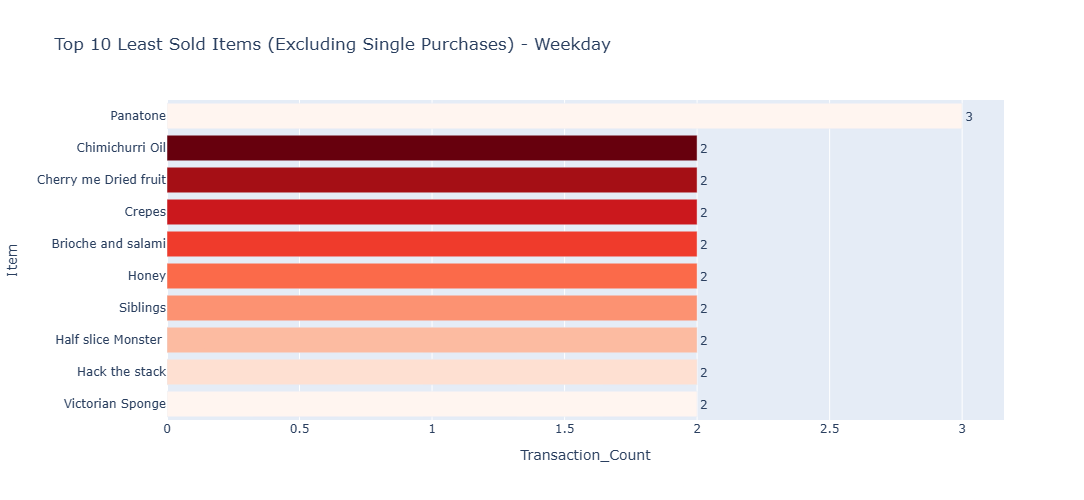

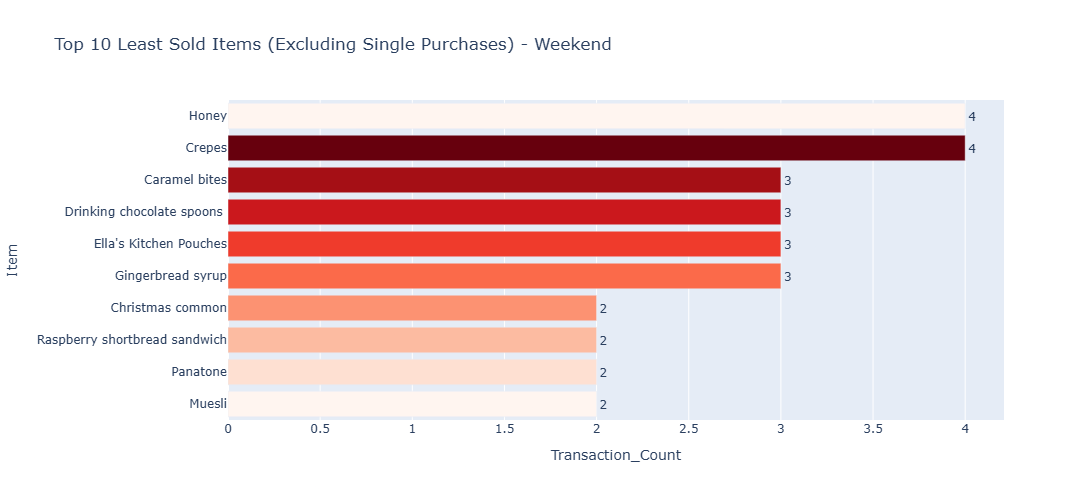

In [86]:
for period in ['Weekday', 'Weekend']:
    period_df = df[df['weekday_weekend'].str.capitalize() == period]

    agg = (
        period_df.groupby('Item')
        .size()
        .reset_index(name='Transaction_Count')
    )
    agg = agg[agg['Transaction_Count'] > 1]

    least_10 = agg.sort_values('Transaction_Count').head(10)

    fig = px.bar(
        least_10,
        x='Transaction_Count',
        y='Item',
        orientation='h',
        color='Item',
        title=f'Top 10 Least Sold Items (Excluding Single Purchases) - {period}',
        color_discrete_sequence=px.colors.sequential.Reds,
        text='Transaction_Count',
        height=500,
        width=700
    )
    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)
    fig.update_traces(textposition='outside')
    fig.show()


Data transforamtion for apriori 

In [87]:
transactions_series = df.groupby('Transaction')['Item'].apply(list)
transactions_list = transactions_series.tolist()
transactions_list

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [88]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
basket = pd.DataFrame(te_ary, columns=te.columns_)

In [89]:
basket.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
item_frequencies = basket.sum().sort_values(ascending=False)
least_frequent_items = basket.sum().sort_values()


In [91]:
item_frequencies.head(10)

Coffee           4528
Bread            3097
Tea              1350
Cake              983
Pastry            815
Sandwich          680
Medialuna         585
Hot chocolate     552
Cookies           515
Brownie           379
dtype: int64

In [92]:
least_frequent_items.head(10)

Adjustment        1
Olum & polenta    1
Polenta           1
Bacon             1
Gift voucher      1
The BART          1
Raw bars          1
Chicken sand      1
Siblings          2
Spread            2
dtype: int64

Hyper parameter tuning 

In [93]:
from mlxtend.frequent_patterns import apriori, association_rules

param_grid = [
    {'min_support': 0.01, 'metric': 'lift', 'min_threshold': 1.0},
    {'min_support': 0.03, 'metric': 'lift', 'min_threshold': 1.0},
    {'min_support': 0.05, 'metric': 'lift', 'min_threshold': 1.0},
    {'min_support': 0.05, 'metric': 'confidence', 'min_threshold': 0.6},
    {'min_support': 0.05, 'metric': 'confidence', 'min_threshold': 0.8},
    {'min_support': 0.1, 'metric': 'lift', 'min_threshold': 1.2},
]

for params in param_grid:
    print(f"\nParameters: min_support={params['min_support']}, metric={params['metric']}, min_threshold={params['min_threshold']}")

    frequent_itemsets = apriori(basket, min_support=params['min_support'], use_colnames=True)
    
    rules = association_rules(frequent_itemsets, metric=params['metric'], min_threshold=params['min_threshold'])
    
    print(f"Frequent Itemsets: {len(frequent_itemsets)}")
    print(f"Rules Generated: {len(rules)}")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))



Parameters: min_support=0.01, metric=lift, min_threshold=1.0
Frequent Itemsets: 61
Rules Generated: 42
   antecedents  consequents   support  confidence      lift
0  (Alfajores)     (Coffee)  0.019651    0.540698  1.130235
1     (Coffee)  (Alfajores)  0.019651    0.041078  1.130235
2      (Bread)     (Pastry)  0.029160    0.089119  1.034977
3     (Pastry)      (Bread)  0.029160    0.338650  1.034977
4    (Brownie)     (Coffee)  0.019651    0.490765  1.025860

Parameters: min_support=0.03, metric=lift, min_threshold=1.0
Frequent Itemsets: 23
Rules Generated: 8
   antecedents  consequents   support  confidence      lift
0     (Coffee)       (Cake)  0.054728    0.114399  1.101515
1       (Cake)     (Coffee)  0.054728    0.526958  1.101515
2  (Medialuna)     (Coffee)  0.035182    0.569231  1.189878
3     (Coffee)  (Medialuna)  0.035182    0.073542  1.189878
4     (Pastry)     (Coffee)  0.047544    0.552147  1.154168

Parameters: min_support=0.05, metric=lift, min_threshold=1.0
Frequent It

Implementation of selected

In [94]:

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

In [95]:
frequent_itemsets.head(10)

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


Rule generation

In [97]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,1.0,0.002264,1.004936,0.220910,0.039693,0.004912,0.290888
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.050231,0.075908,0.003296,0.213884
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,1.0,0.000495,1.024293,0.026259,0.039398,0.023717,0.265921
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,1.0,0.000495,1.001080,0.048327,0.039398,0.001079,0.265921
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.176684,0.103745,0.011765,0.320679
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760


Apriori Visualizations

In [98]:
import plotly.express as px

rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules['rule'] = rules['antecedents_str'] + " → " + rules['consequents_str']

top_rules = rules.sort_values('confidence', ascending=False).head(10)

top_rules['confidence_text'] = top_rules['confidence'].apply(lambda x: f"{x:.2f}")

fig = px.bar(
    top_rules,
    x='confidence',
    y='rule',
    color='lift',
    text='confidence_text',  
    title='Top 10 Association Rules by Confidence',
    color_continuous_scale='Tealrose',
    height=600
)

fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='Confidence',
    coloraxis_colorbar_title='Lift'
)
fig.update_traces(textposition='outside')  

fig.show()


In [99]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str,rule,confidence_text
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936,Toast,Coffee,Toast → Coffee,0.70
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792,Spanish Brunch,Coffee,Spanish Brunch → Coffee,0.60
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387,Medialuna,Coffee,Medialuna → Coffee,0.57
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764,Pastry,Coffee,Pastry → Coffee,0.55
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888,Alfajores,Coffee,Alfajores → Coffee,0.54
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656,Juice,Coffee,Juice → Coffee,0.53
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150,Sandwich,Coffee,Sandwich → Coffee,0.53
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679,Cake,Coffee,Cake → Coffee,0.53
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350,Scone,Coffee,Scone → Coffee,0.52
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707,Cookies,Coffee,Cookies → Coffee,0.52


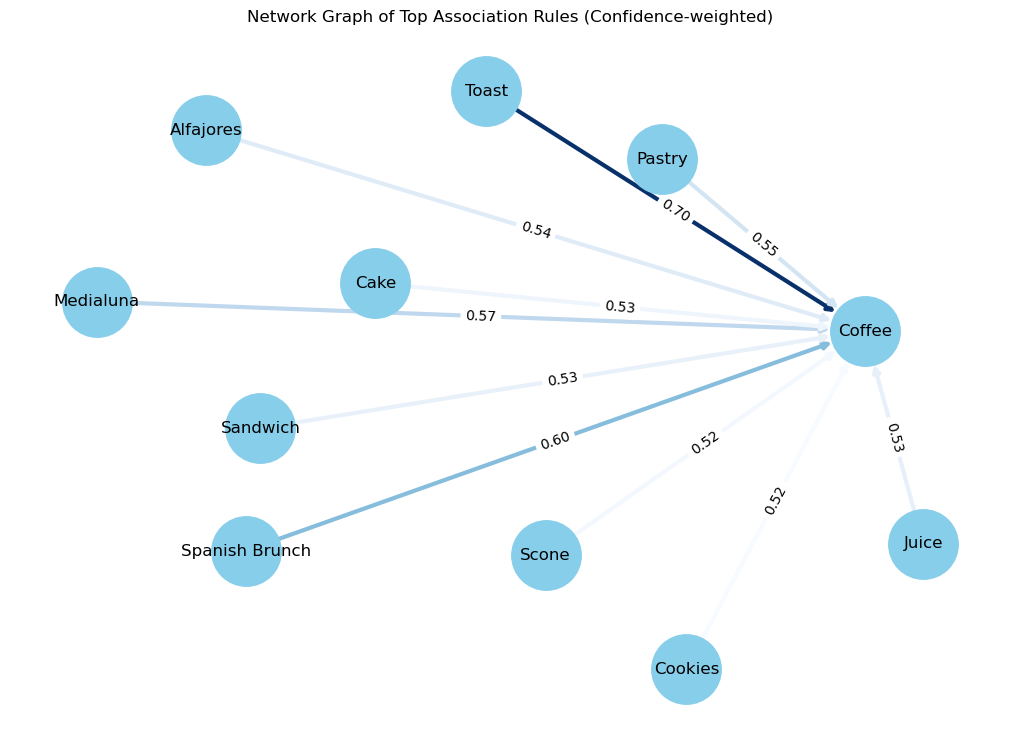

In [100]:


top_rules_graph = rules.sort_values('confidence', ascending=False).head(10)

G = nx.DiGraph()

for _, row in top_rules_graph.iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['confidence'])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, seed=42)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', edge_color=weights,
        width=3.0, edge_cmap=plt.cm.Blues, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})

plt.title("Network Graph of Top Association Rules (Confidence-weighted)")
plt.axis('off')
plt.show()


In [101]:
filtered_rules = rules[
    ~rules['antecedents'].apply(lambda x: 'Coffee' in x) &
    ~rules['consequents'].apply(lambda x: 'Coffee' in x)
]
filtered_rules['antecedents_str'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
filtered_rules['consequents_str'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))
filtered_rules['rule'] = filtered_rules['antecedents_str'] + " → " + filtered_rules['consequents_str']

filtered_rules['confidence_text'] = filtered_rules['confidence'].apply(lambda x: f"{x:.2f}")
filtered_rules['lift_text'] = filtered_rules['lift'].apply(lambda x: f"{x:.2f}")


C:\Users\safal\AppData\Local\Temp\ipykernel_17488\2784828052.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\safal\AppData\Local\Temp\ipykernel_17488\2784828052.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\safal\AppData\Local\Temp\ipykernel_17488\2784828052.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [102]:
import plotly.express as px

top_by_confidence = filtered_rules.sort_values('confidence', ascending=False).head(10)

fig_conf = px.bar(
    top_by_confidence,
    x='confidence',
    y='rule',
    color='lift',
    text='confidence_text',
    title='Top 10 Association Rules by Confidence (Excl. Coffee)',
    color_continuous_scale='Tealrose',
    height=600
)
fig_conf.update_layout(yaxis={'categoryorder': 'total ascending'}, xaxis_title='Confidence', coloraxis_colorbar_title='Lift')
fig_conf.update_traces(textposition='outside')
fig_conf.show()


C:\Users\safal\AppData\Local\Temp\ipykernel_17488\3880260650.py:34: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



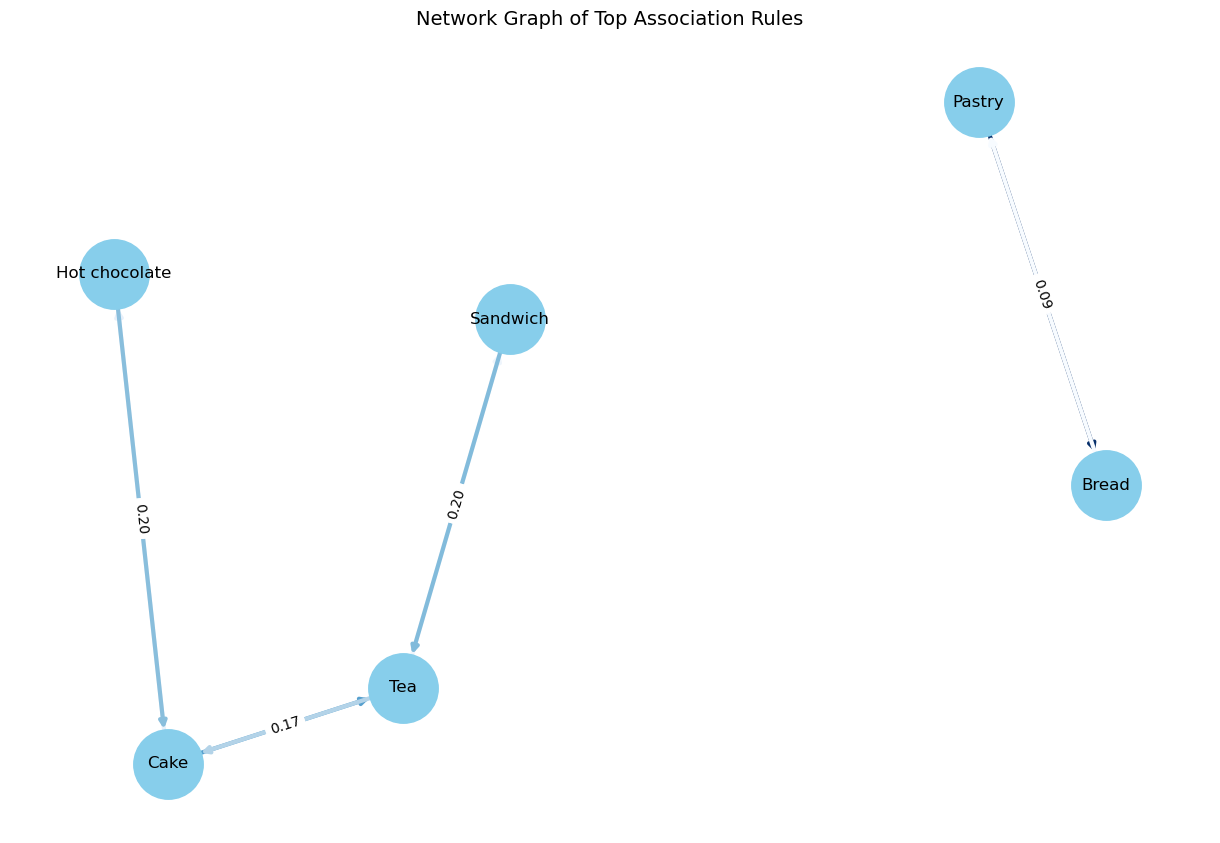

In [103]:


filtered_rules = rules[
    ~rules['antecedents'].apply(lambda x: 'Coffee' in x) &
    ~rules['consequents'].apply(lambda x: 'Coffee' in x)
]

top_rules_graph = filtered_rules.sort_values('confidence', ascending=False).head(10)

G = nx.DiGraph()

for _, row in top_rules_graph.iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['confidence'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.6, seed=42)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

nx.draw(
    G, pos, with_labels=True,
    node_size=2500,
    node_color='skyblue',
    edge_color=weights,
    width=3,
    edge_cmap=plt.cm.Blues,
    arrows=True
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Network Graph of Top Association Rules", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [104]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

def run_apriori(data, min_support=0.01, metric='lift', min_threshold=1):
    transactions = data.groupby('Transaction')['Item'].apply(list).tolist()
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    return frequent_itemsets, rules

results = {}

for day_type in df['weekday_weekend'].unique():
    for time_period in df['period_day'].unique():
        segment = df[(df['weekday_weekend'] == day_type) & (df['period_day'] == time_period)]
        if segment.empty:
            continue
        frequent_itemsets, rules = run_apriori(segment)
        print(f"Results for {day_type} - {time_period}:")
        if not rules.empty:
            print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        else:
            print("No rules found.")
        results[(day_type, time_period)] = (frequent_itemsets, rules)


Results for Weekend - Morning:
            antecedents          consequents   support  confidence      lift
0           (Alfajores)             (Coffee)  0.013058    0.558824  1.143584
1              (Coffee)          (Alfajores)  0.013058    0.026723  1.143584
2               (Bread)             (Pastry)  0.054296    0.138112  1.004764
3              (Pastry)              (Bread)  0.054296    0.395000  1.004764
4             (Brownie)             (Coffee)  0.026117    0.612903  1.254253
5              (Coffee)            (Brownie)  0.026117    0.053446  1.254253
6                 (Tea)               (Cake)  0.011684    0.138211  1.862014
7                (Cake)                (Tea)  0.011684    0.157407  1.862014
8              (Coffee)            (Cookies)  0.022680    0.046414  1.274182
9             (Cookies)             (Coffee)  0.022680    0.622642  1.274182
10             (Coffee)      (Hot chocolate)  0.041924    0.085795  1.273788
11      (Hot chocolate)             (Coffee) 

In [105]:
import plotly.express as px

for (day_type, period), (freq_itemsets, rules) in results.items():
    if rules.empty:
        print(f"No rules found for {day_type} - {period}")
        continue
    
    top_rules = rules.sort_values('confidence', ascending=False).head(5).copy()
    top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    top_rules['rule'] = top_rules['antecedents_str'] + " → " + top_rules['consequents_str']
    top_rules['confidence_text'] = top_rules['confidence'].apply(lambda x: f"{x:.2f}")
    
    fig = px.bar(
        top_rules,
        x='confidence',
        y='rule',
        orientation='h',
        color='lift',
        color_continuous_scale='Viridis',
        text='confidence_text',
        title=f'Top 5 Rules by Confidence: {day_type} - {period}',
        labels={'confidence': 'Confidence', 'rule': 'Rule', 'lift': 'Lift'}
    )
    fig.update_layout(yaxis=dict(autorange='reversed'), height=400)
    fig.update_traces(textposition='outside')
    fig.show()


No rules found for Weekend - Night


In [106]:
import plotly.express as px

for (day_type, period), (freq_itemsets, rules) in results.items():
    if rules.empty:
        print(f"No rules found for {day_type} - {period}")
        continue
    
    rules_no_coffee = rules[
        ~rules['antecedents'].apply(lambda x: 'Coffee' in x) &
        ~rules['consequents'].apply(lambda x: 'Coffee' in x)
    ]
    
    if rules_no_coffee.empty:
        print(f"No rules (excluding Coffee) found for {day_type} - {period}")
        continue
    
    top_rules = rules_no_coffee.sort_values('confidence', ascending=False).head(5).copy()
    top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    top_rules['rule'] = top_rules['antecedents_str'] + " → " + top_rules['consequents_str']
    top_rules['confidence_text'] = top_rules['confidence'].apply(lambda x: f"{x:.2f}")
    
    fig = px.bar(
        top_rules,
        x='confidence',
        y='rule',
        orientation='h',
        color='lift',
        color_continuous_scale='Viridis',
        text='confidence_text',
        title=f'Top 5 Rules by Confidence (Excl. Coffee): {day_type} - {period}',
        labels={'confidence': 'Confidence', 'rule': 'Rule', 'lift': 'Lift'}
    )
    fig.update_layout(yaxis=dict(autorange='reversed'), height=400)
    fig.update_traces(textposition='outside')
    fig.show()


No rules found for Weekend - Night


FP growth Implementation

Encoding for FP growth 

In [107]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


Implemenation 

In [108]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.02)

top_10_rules_fp = rules_fp.sort_values('confidence', ascending=False).head(10)

print("Top 10 FP-Growth rules by confidence:")
print(top_10_rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 10 FP-Growth rules by confidence:
         antecedents consequents   support  confidence      lift
68           (Toast)    (Coffee)  0.023666    0.704403  1.472431
72  (Spanish Brunch)    (Coffee)  0.010882    0.598837  1.251766
24       (Medialuna)    (Coffee)  0.035182    0.569231  1.189878
14          (Pastry)    (Coffee)  0.047544    0.552147  1.154168
60       (Alfajores)    (Coffee)  0.019651    0.540698  1.130235
33           (Juice)    (Coffee)  0.020602    0.534247  1.116750
58        (Sandwich)    (Coffee)  0.038246    0.532353  1.112792
37            (Cake)    (Coffee)  0.054728    0.526958  1.101515
71           (Scone)    (Coffee)  0.018067    0.522936  1.093107
9          (Cookies)    (Coffee)  0.028209    0.518447  1.083723


In [109]:
import plotly.express as px

top_10_rules_fp['antecedents_str'] = top_10_rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))
top_10_rules_fp['consequents_str'] = top_10_rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))
top_10_rules_fp['rule'] = top_10_rules_fp['antecedents_str'] + " → " + top_10_rules_fp['consequents_str']
top_10_rules_fp['confidence_text'] = top_10_rules_fp['confidence'].apply(lambda x: f"{x:.2f}")

fig = px.bar(
    top_10_rules_fp,
    x='confidence',
    y='rule',
    orientation='h',
    color='lift',
    color_continuous_scale='Viridis',
    title='Top 10 FP-Growth Association Rules by Confidence',
    labels={'confidence': 'Confidence', 'rule': 'Rule', 'lift': 'Lift'},
    text='confidence_text'
)

fig.update_layout(yaxis={'autorange': 'reversed'}, height=500)
fig.update_traces(textposition='outside')
fig.show()


In [110]:
rules_no_coffee = rules_fp[
    ~rules_fp['antecedents'].apply(lambda x: 'Coffee' in x) &
    ~rules_fp['consequents'].apply(lambda x: 'Coffee' in x)
]

top_10_no_coffee = rules_no_coffee.sort_values('confidence', ascending=False).head(10)

print(top_10_no_coffee[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


        antecedents consequents   support  confidence      lift
17         (Pastry)     (Bread)  0.029160    0.338650  1.034977
62      (Alfajores)     (Bread)  0.010354    0.284884  0.870657
27      (Medialuna)     (Bread)  0.016904    0.273504  0.835879
66        (Brownie)     (Bread)  0.010777    0.269129  0.822508
11        (Cookies)     (Bread)  0.014474    0.266019  0.813004
56       (Sandwich)     (Bread)  0.017010    0.236765  0.723596
5   (Hot chocolate)     (Bread)  0.013418    0.230072  0.703144
39           (Cake)       (Tea)  0.023772    0.228891  1.604781
41           (Cake)     (Bread)  0.023349    0.224822  0.687097
54       (Sandwich)       (Tea)  0.014369    0.200000  1.402222


In [111]:

rules_no_coffee = rules_fp[
    ~rules_fp['antecedents'].apply(lambda x: 'Coffee' in x) &
    ~rules_fp['consequents'].apply(lambda x: 'Coffee' in x)
]

top_10_no_coffee = rules_no_coffee.sort_values('confidence', ascending=False).head(10).copy()

top_10_no_coffee['antecedents_str'] = top_10_no_coffee['antecedents'].apply(lambda x: ', '.join(list(x)))
top_10_no_coffee['consequents_str'] = top_10_no_coffee['consequents'].apply(lambda x: ', '.join(list(x)))
top_10_no_coffee['rule'] = top_10_no_coffee['antecedents_str'] + " → " + top_10_no_coffee['consequents_str']
top_10_no_coffee['confidence_text'] = top_10_no_coffee['confidence'].apply(lambda x: f"{x:.2f}")

fig = px.bar(
    top_10_no_coffee,
    x='confidence',
    y='rule',
    orientation='h',
    color='lift',
    color_continuous_scale='Viridis',
    title='Top 10 FP-Growth Rules by Confidence (Excluding Coffee)',
    labels={'confidence': 'Confidence', 'rule': 'Rule', 'lift': 'Lift'},
    text='confidence_text'
)

fig.update_layout(yaxis={'autorange': 'reversed'}, height=500)
fig.update_traces(textposition='outside')
fig.show()


Prefix Span

In [112]:
from prefixspan import PrefixSpan

sequences = df.sort_values(['Transaction', 'date_time']).groupby('Transaction')['Item'].apply(list).tolist()


Implemenation for Prefix Span

In [113]:
ps = PrefixSpan(sequences)

min_support = int(0.01 * len(sequences))

results = ps.frequent(min_support)

for seq in results[:10]:
    print(f"Support: {seq[0]}, Sequence: {seq[1]}")


Support: 3097, Sequence: ['Bread']
Support: 103, Sequence: ['Bread', 'Medialuna']
Support: 217, Sequence: ['Bread', 'Bread']
Support: 343, Sequence: ['Bread', 'Coffee']
Support: 179, Sequence: ['Bread', 'Pastry']
Support: 122, Sequence: ['Bread', 'Tea']
Support: 96, Sequence: ['Bread', 'Cookies']
Support: 134, Sequence: ['Bread', 'Cake']
Support: 275, Sequence: ['Scandinavian']
Support: 552, Sequence: ['Hot chocolate']


In [114]:
import plotly.express as px
import pandas as pd


top_results = results[:10]

df_seq = pd.DataFrame({
    'sequence': [' → '.join(seq) for _, seq in top_results],
    'support': [support for support, _ in top_results]
})

fig = px.bar(
    df_seq,
    x='support',
    y='sequence',
    orientation='h',
    title='Top 10 Sequential Purchase Patterns',
    labels={'support': 'Support Count', 'sequence': 'Sequence'},
    text='support'
)
fig.update_layout(yaxis={'autorange': 'reversed'}) 
fig.update_traces(textposition='outside')
fig.show()


Comaprision between models 

In [115]:
transactions = df.groupby('Transaction')['Item'].apply(list).tolist()
transactions = [list(set(t)) for t in transactions] 
te = TransactionEncoder()
df_encoded = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

In [116]:
start = time.time()
frequent_ap = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules_ap = association_rules(frequent_ap, metric="confidence", min_threshold=0.5)
apriori_time = time.time() - start
start = time.time()
frequent_fp = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rules_fp = association_rules(frequent_fp, metric="confidence", min_threshold=0.5)
fpgrowth_time = time.time() - start
start = time.time()
from prefixspan import PrefixSpan
import time

sequences = df.groupby('Transaction')['Item'].apply(list).tolist()

min_support = int(0.01 * len(sequences))

start = time.time()

ps = PrefixSpan(sequences)
results = ps.frequent(min_support)

prefixspan_time = time.time() - start


In [117]:
comparison_df = pd.DataFrame({
    'Algorithm': ['Apriori', 'FP-Growth', 'PrefixSpan'],
    'Time (s)': [apriori_time, fpgrowth_time, prefixspan_time],
    'Rules/Patterns Generated': [
        len(rules_ap),
        len(rules_fp),
        len(results)
    ]
})


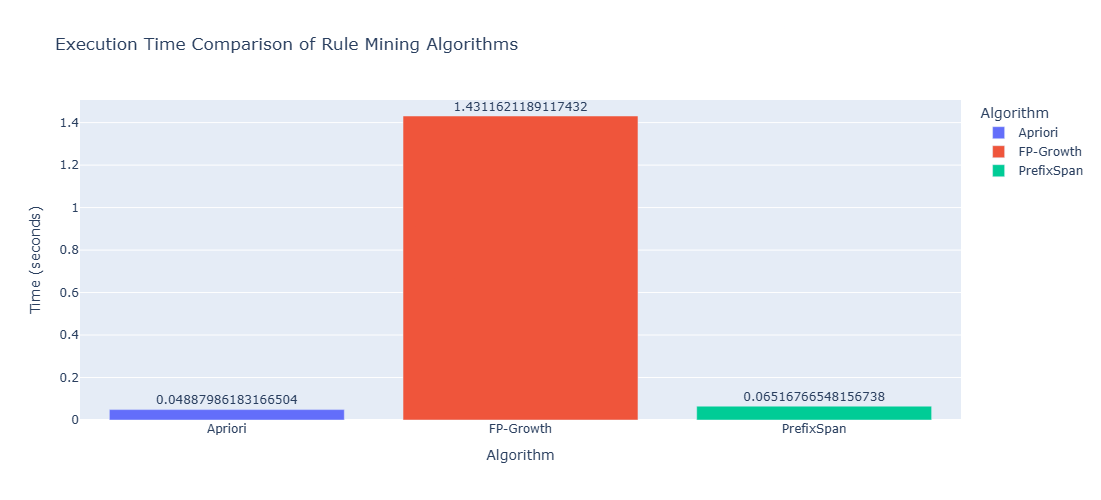

In [118]:
fig_time = px.bar(
    comparison_df,
    x='Algorithm',
    y='Time (s)',
    color='Algorithm',
    text='Time (s)',
    title='Execution Time Comparison of Rule Mining Algorithms',
    height=500
)
fig_time.update_traces(textposition='outside')
fig_time.update_layout(yaxis_title='Time (seconds)')
fig_time.show()


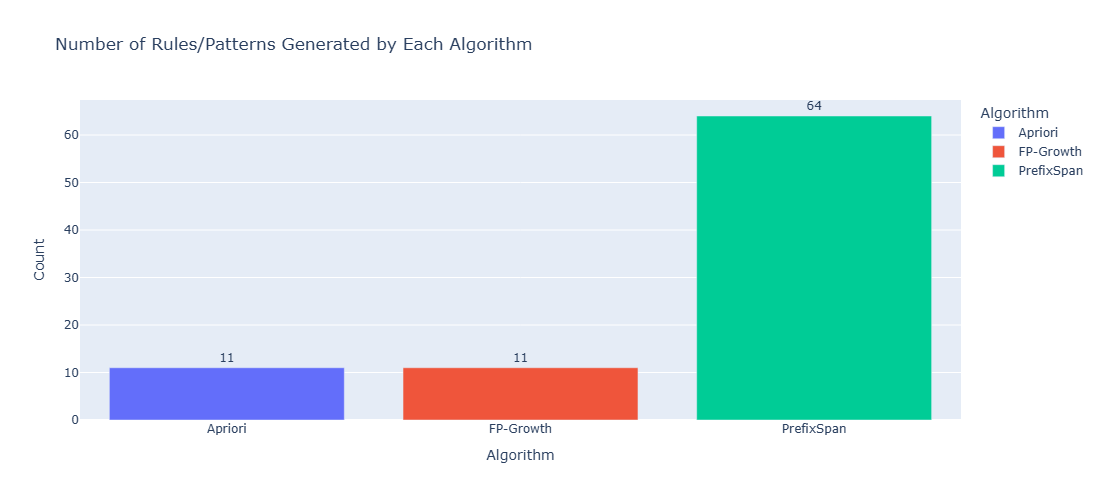

In [119]:
fig_rules = px.bar(
    comparison_df,
    x='Algorithm',
    y='Rules/Patterns Generated',
    color='Algorithm',
    title='Number of Rules/Patterns Generated by Each Algorithm',
    text='Rules/Patterns Generated',
    height=500
)
fig_rules.update_traces(textposition='outside')
fig_rules.update_layout(yaxis_title='Count')
fig_rules.show()
